# **PROJECT 1 - Introduction to Machine Learning and Artificial Intelligence**

Here is the interactive code for the first project. This code is set based on the example of an industrial application for an air production unit in a utility plant. To use this code, you must utilise the dataset from the given file .csv named "Air_Production_Dataset.csv".

# **Utility Plant - Air Production Unit**

The air production unit separates atmospheric air into its primary components, such as oxygen and nitrogen. These products are further utilised for different applications. For example, oxygen is required in steelmaking process, which uses two tons of oxygen per ton of steel. Similarly, nitrogen is used in the Haber process to make ammonia.

In addition, the air production unit is responsible for producing plant air and instrument air for pneumatic systems. In this process, the air is compressed, and its humidity is reduced.

This project aims to understand the relationship between different features in this process, particularly production of the oxygen and plant air with the input energy.

***There are some optional hints added for each question at the end of this page.***

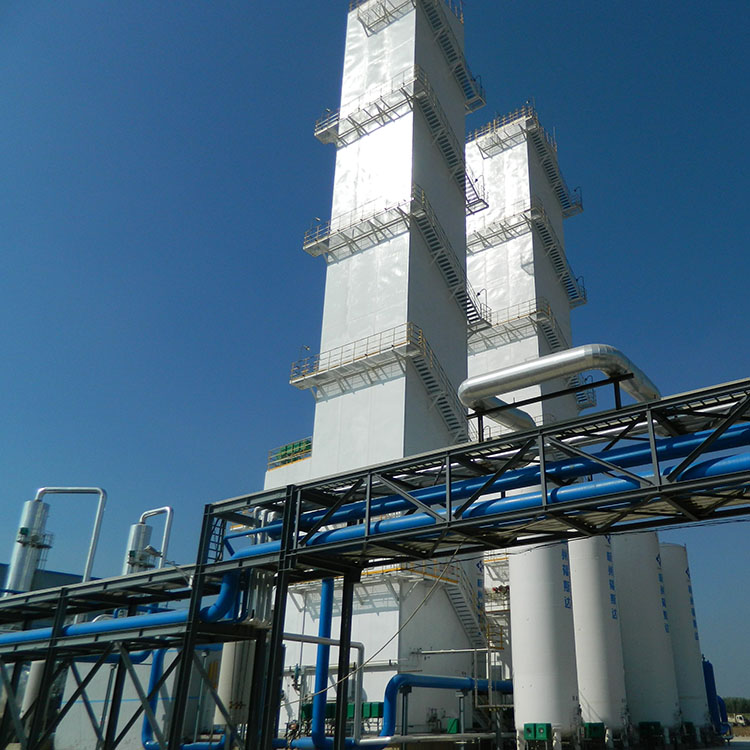

# **Multivariate Linear Regression**
In this project, implementing a multivariate linear regression for an industrial process is studied.

## Import the TensorFlow
First, let's call the TensorFlow,

In [1]:
# Run on TensorFlow 2.x
#tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

## Import relevant modules
Then, we need to import some necessary modules for data preparation, computation, plotting, etc.

In [2]:
#Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import seaborn as sns

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
#pd.options.display.float_format = "{:.1f}".format

print("Imported modules.")

Imported modules.


## Load the dataset
Here we need to load the dataset.

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploa1ded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

ModuleNotFoundError: No module named 'google.colab'

In [3]:
# Import the dataset.
dataset = pd.read_csv(filepath_or_buffer="Air_Production_Dataset.csv")

# Print the first rows of the dataset.
dataset.head()

,Plant_Air_NM3,Instrument_Air_NM3,Steam_Ton,Power_MWh,Production_N2_NM3,Production_O2_NM3,Production_CA_NM3,Total_Production_NM3,Energy_Input_MJ,EnPI_MJ_NM3
0,3939978,11642519,11187,101794,45881531,81889902.0,15595519,143366952.0,402957113.2,2.83
1,4374478,11307519,11256,110171,40087531,69954502.0,15695019,125737052.0,433339347.0,3.46
2,4297032,11183877,11395,111194,42499855,79777315.0,15493931,137771101.0,437475476.0,3.19
3,5023478,11767519,11430,110436,42103531,78034502.0,16804019,136942052.0,434860823.6,3.19
4,5194062,11565350,11186,108660,41721030,79513535.0,16772434,138006999.0,427671451.8,3.12


**Question 1:**
Show the statistics of the dataset including the number of examples, the mean value for each feature, the standard deviation for each feature and so on.

In [4]:
# Get statistics on the dataset.
# Write your code between the lines (~ 1 line)
#################################################
#pd.options.display.float_format = '{:,.2f}'.format
dataset.describe()
################################################

,Plant_Air_NM3,Instrument_Air_NM3,Steam_Ton,Power_MWh,Production_N2_NM3,Production_O2_NM3,Production_CA_NM3,Total_Production_NM3,Energy_Input_MJ,EnPI_MJ_NM3
count,3.500000e+01,3.500000e+01,35.000000,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,35.000000
mean,4.900790e+06,1.263814e+07,10806.142857,110771.857143,3.789641e+07,8.567720e+07,1.755195e+07,1.411256e+08,4.340353e+08,3.101714
std,9.579134e+05,1.010165e+06,395.090618,6774.743443,2.952302e+06,1.020471e+07,1.754732e+06,1.101033e+07,2.496054e+07,0.150675
min,3.681978e+06,1.118388e+07,9734.000000,90951.000000,3.216803e+07,5.595250e+07,1.515772e+07,1.049331e+08,3.608925e+08,2.830000
25%,4.091106e+06,1.181852e+07,10560.500000,108650.500000,3.579603e+07,7.952202e+07,1.631083e+07,1.355118e+08,4.270257e+08,3.020000
50%,4.638478e+06,1.230952e+07,10811.000000,111556.000000,3.823953e+07,8.899050e+07,1.680402e+07,1.451004e+08,4.374530e+08,3.070000
75%,5.416728e+06,1.361852e+07,11096.000000,116016.000000,3.983653e+07,9.391500e+07,1.914902e+07,1.491921e+08,4.537910e+08,3.185000
max,6.844478e+06,1.430152e+07,11624.000000,118584.000000,4.588153e+07,9.953550e+07,2.115902e+07,1.554490e+08,4.625403e+08,3.460000


Then, find features correlation matrix.

**Question 2:**
Show the correlation among features.

In [5]:
# Generate a correlation matrix.
# Write your code between the lines (~ 1 line)
#################################################
dataset.corr()
#################################################

,Plant_Air_NM3,Instrument_Air_NM3,Steam_Ton,Power_MWh,Production_N2_NM3,Production_O2_NM3,Production_CA_NM3,Total_Production_NM3,Energy_Input_MJ,EnPI_MJ_NM3
Plant_Air_NM3,1.000000,0.589599,-0.011278,0.420193,-0.279771,0.374028,0.885324,0.412738,0.409991,-0.212216
Instrument_Air_NM3,0.589599,1.000000,-0.345219,0.343741,-0.427124,0.488362,0.897545,0.481143,0.318050,-0.424094
Steam_Ton,-0.011278,-0.345219,1.000000,0.422283,0.521276,0.129450,-0.204893,0.227099,0.464237,0.163877
Power_MWh,0.420193,0.343741,0.422283,1.000000,0.055532,0.800510,0.427270,0.824922,0.998905,-0.198397
Production_N2_NM3,-0.279771,-0.427124,0.521276,0.055532,1.000000,-0.132018,-0.398615,0.082253,0.081170,-0.061806
Production_O2_NM3,0.374028,0.488362,0.129450,0.800510,-0.132018,1.000000,0.485324,0.968778,0.788865,-0.691564
Production_CA_NM3,0.885324,0.897545,-0.204893,0.427270,-0.398615,0.485324,1.000000,0.502300,0.406910,-0.359992
Total_Production_NM3,0.412738,0.481143,0.227099,0.824922,0.082253,0.968778,0.502300,1.000000,0.817759,-0.714908
Energy_Input_MJ,0.409991,0.318050,0.464237,0.998905,0.081170,0.788865,0.406910,0.817759,1.000000,-0.185395
EnPI_MJ_NM3,-0.212216,-0.424094,0.163877,-0.198397,-0.061806,-0.691564,-0.359992,-0.714908,-0.185395,1.000000


## Normalize values
The values of different features should cover roughly similar ranges. Therefore, normalizing the dataset can be a necessary step before building the model. Here we calculate the Z-score for each feature column.

**Question 3:** According to the lectures, if the ranges of different features are much different, we should normalize the dataset. Here, find the normalized dataset.

In [6]:
# Convert raw values to their Z-scores
# Calculate the Z-scores of each column in the dataset:
# Write your code between the lines (~ 3 lines)
#################################################
dataset_mean = dataset.mean()
dataset_std = dataset.std()
dataset_norm = (dataset - dataset_mean)/dataset_std
#################################################
print("Dataset normalized.")

Dataset normalized.


## Split the dataset

**Question 4:**
After reading the dataset, we should split it into the training and test sets. In this case, the model would be first trained on the training set and then tested on the test set (which would be unseen during training). Therefore, the final evaluation of the model would be more accurate. So, here split the dataset into the training set (80%) and the test set (20%). Make sure that the random state is set as `random_state=100`.

In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset into the training set (80%) and the test set (20%).
# Write your code between the lines (~ 1 line)
#################################################
train_set_norm, test_set_norm = train_test_split(dataset, train_size=0.8, test_size=0.2, random_state=100)
#################################################
print("Dataset split.")

Dataset split.


## Represent input features
Then, the feature layer is defined. The feature layer would contain the features that are used during training. The following code specifies these features.

In [8]:
# Create an empty list that will eventually hold all created feature columns.
feature_columns = []

# Represent Production_O2_NM3 as a floating-point value.
Oxygen = tf.feature_column.numeric_column("Production_O2_NM3")
feature_columns.append(Oxygen)

# Represent Plant_Air_NM3 as a floating-point value.
Air = tf.feature_column.numeric_column("Plant_Air_NM3")
feature_columns.append(Air)

# Complete this section later for *Question7*
# Write your code between the lines (~ 2 lines)
#################################################
# Represent Instrument_Air_NM3 as a floating-point value.
instrument_air = tf.feature_column.numeric_column("Instrument_Air_NM3")
feature_columns.append(instrument_air)

#################################################

# Convert the list of feature columns into a layer that will later be fed into
# the model. 
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

Here the plotting function is defined.

In [9]:
# Define the plotting function.

def plot_the_loss_curve(epochs, mse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")

  plt.plot(epochs, mse, label="Loss")
  plt.legend()
  plt.ylim([mse.min()*0.95, mse.max() * 1.03])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


## Define a multivariate linear regression model
Here we define a function to create and train a linear regression model.

In [10]:
# Define functions to create and train a linear regression model
def create_model(learning_rate, feature_layer):
  """Create and compile a linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(feature_layer)

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

  return model           


def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""

  # Split the dataset into features and label.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)
  
  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # Get details that will be useful for plotting the loss curve.
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  mse = hist["mean_squared_error"]

  return trained_weight, trained_bias, epochs, mse

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


## Build and train the model
The following code invokes the defined functions to train the linear regression model.

**Question 5:** Set and tune the hyperparameters, i.e. the learning rate, the number of epochs and the batch size, to train the model efficiently.

2022-07-14 20:45:45.029077: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-14 20:45:45.030095: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 28 samples
Epoch 1/200
28/28 [==============================] - 1s 42ms/sample - loss: 107070386478252032.0000 - mean_squared_error: 107070382183284736.0000
Epoch 2/200
28/28 [==============================] - 0s 360us/sample - loss: 102190126808956928.0000 - mean_squared_error: 102190122513989632.0000
Epoch 3/200
28/28 [==============================] - 0s 349us/sample - loss: 98743228722839552.0000 - mean_squared_error: 98743230870323200.0000
Epoch 4/200
28/28 [==============================] - 0s 338us/sample - loss: 95754824838021120.0000 - mean_squared_error: 95754818395570176.0000
Epoch 5/200
28/28 [==============================] - 0s 393us/sample - loss: 92999562515447808.0000 - mean_squared_error: 92999562515447808.0000
Epoch 6/200
28/28 [==============================] - 0s 354us/sample - loss: 90394892483690496.0000 - mean_squared_error: 90394896778657792.0000
Epoch 7/200
28/28 [==============================] - 0s 372us/sample - loss: 87897545094725632.0000 - mean_

28/28 [==============================] - 0s 400us/sample - loss: 10346059209375744.0000 - mean_squared_error: 10346058672504832.0000
Epoch 58/200
28/28 [==============================] - 0s 394us/sample - loss: 9621359311192064.0000 - mean_squared_error: 9621359176974336.0000
Epoch 59/200
28/28 [==============================] - 0s 389us/sample - loss: 8927101872766976.0000 - mean_squared_error: 8927101872766976.0000
Epoch 60/200
28/28 [==============================] - 0s 358us/sample - loss: 8264985151012864.0000 - mean_squared_error: 8264985419448320.0000
Epoch 61/200
28/28 [==============================] - 0s 459us/sample - loss: 7632818444173312.0000 - mean_squared_error: 7632818309955584.0000
Epoch 62/200
28/28 [==============================] - 0s 371us/sample - loss: 7032917008056320.0000 - mean_squared_error: 7032917142274048.0000
Epoch 63/200
28/28 [==============================] - 0s 404us/sample - loss: 6463254960275456.0000 - mean_squared_error: 6463255228710912.0000
Epo

28/28 [==============================] - 0s 405us/sample - loss: 823122655707136.0000 - mean_squared_error: 823122630541312.0000
Epoch 115/200
28/28 [==============================] - 0s 449us/sample - loss: 834478784118784.0000 - mean_squared_error: 834478725398528.0000
Epoch 116/200
28/28 [==============================] - 0s 431us/sample - loss: 819069452288000.0000 - mean_squared_error: 819069456482304.0000
Epoch 117/200
28/28 [==============================] - 0s 424us/sample - loss: 817431035510784.0000 - mean_squared_error: 817431060676608.0000
Epoch 118/200
28/28 [==============================] - 0s 358us/sample - loss: 820874240327680.0000 - mean_squared_error: 820874215161856.0000
Epoch 119/200
28/28 [==============================] - 0s 428us/sample - loss: 820815427796992.0000 - mean_squared_error: 820815427796992.0000
Epoch 120/200
28/28 [==============================] - 0s 426us/sample - loss: 818079374245888.0000 - mean_squared_error: 818079466520576.0000
Epoch 121/200

28/28 [==============================] - 0s 852us/sample - loss: 812070773719040.0000 - mean_squared_error: 812070807273472.0000
Epoch 172/200
28/28 [==============================] - 0s 555us/sample - loss: 819637650456576.0000 - mean_squared_error: 819637600124928.0000
Epoch 173/200
28/28 [==============================] - 0s 498us/sample - loss: 814634416209920.0000 - mean_squared_error: 814634432987136.0000
Epoch 174/200
28/28 [==============================] - 0s 482us/sample - loss: 805609272246272.0000 - mean_squared_error: 805609297412096.0000
Epoch 175/200
28/28 [==============================] - 0s 532us/sample - loss: 812040834777088.0000 - mean_squared_error: 812040876720128.0000
Epoch 176/200
28/28 [==============================] - 0s 489us/sample - loss: 811437870022656.0000 - mean_squared_error: 811437903577088.0000
Epoch 177/200
28/28 [==============================] - 0s 574us/sample - loss: 811821925662720.0000 - mean_squared_error: 811821900496896.0000
Epoch 178/200

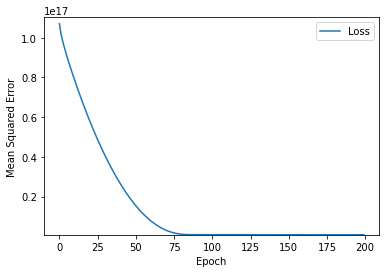


The learned weight for your model is [[3.7458203]
 [3.4172323]
 [4.270204 ]]
The learned bias for your model is [4.229993]


In [11]:
# The following variables are the hyperparameters.
# Write your code between the lines (~ 3 lines)
#################################################
learning_rate = 0.01
epochs = 200
batch_size = 7
#################################################

label_name = "Energy_Input_MJ"

# Establish the model's topography.
model_1 = create_model(learning_rate, feature_layer)

# Train the model on the normalized training set.
weight, bias, epochs, mse = train_model(model_1, train_set_norm, epochs, batch_size, label_name)
plot_the_loss_curve(epochs, mse)

print("\nThe learned weight for your model is", weight)
print("The learned bias for your model is", bias )

**Question 6:** A) What are the trained model's parameters? B) Report the model's performance in terms of the mean squared error by running the following code.

## Measure the performance of the model
Measure the performance of the trained model against the test set.

In [14]:
# Evaluate the trained model against the test set.
test_features = {name:np.array(value) for name, value in test_set_norm.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
print("\n Evaluate the trained linear regression model against the test set:")
model_1.evaluate(x = test_features, y = test_label, batch_size=7)


 Evaluate the trained linear regression model against the test set:
7/1 [==================================================================================================================================================================================================================] - 0s 34ms/sample - loss: 1701158028574720.0000 - mean_squared_error: 1701158028574720.0000


[1701158028574720.0, 1701158000000000.0]

## Add a new feature
Here we investigate the impact of having a new feature added to the model. More features in multivariate linear regression might improve the performance of the model's predictions.

**Question 7:** Add a new feature, *Instrument_Air_NM3* to the feature layer. Add the code in the designated place where the input features are defined (look at the *Represent input features* Section). After adding the new feature to the feature layer and defining the new model, run and train the new model on the same training dataset. Then, measure the performance of the new model. Is there any improvement in the model's performance on the test set? (Report the model's performance in terms of the mean squared error.)

## Optional hints
If you need assistance, you may click on the cell below to see the hints for each question.

In [ ]:
#@title Hints

# Question 1: Use the pandas command "DataFrame.describe()".
# For more information:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

# Question 2: Use the pandas command "DataFrame.corr()".
# For more information:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

# Question 3: The formula for z.score normalization is 
# "z-score = (dataset - dataset_mean)/dataset_standard_deviation".
# To find the mean value use the pandas command "DataFrame.mean()" and
# to find the standard deviation use the pandas command "DataFrame.std()".
# For more information:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html

# Question 4: To split the dataset into the training set and the test set, you
# can use the following sklearn command,
# "train_test_split(dataset_norm, train_size= A, test_size= B, random_state=100)"
# where `A` is a float number between `0.0` and `1.0` and `B` is a float number 
# equals to `1-A`. Make sure that the random state is set as "random_state=100".
# For more information:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# Question 5: For this example, number of epochs cab be around few hundreds,
# the learning rate is around 0.01 and the batch size should be logically less
# than the total number of examples.

# Question 6: The trained model's parameters are in fact the weights and the bias.

# Question 7: Add the new feature "Instrument_Air_NM3" to the feature layer, 
# in a similar way as the other features. 

# Best of luck!